In [5]:
from google.colab import files
uploaded = files.upload()



Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [7]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df.drop('Cabin', axis=1, inplace=True)


In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


/tmp/ipython-input-11-1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-12-411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [13]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


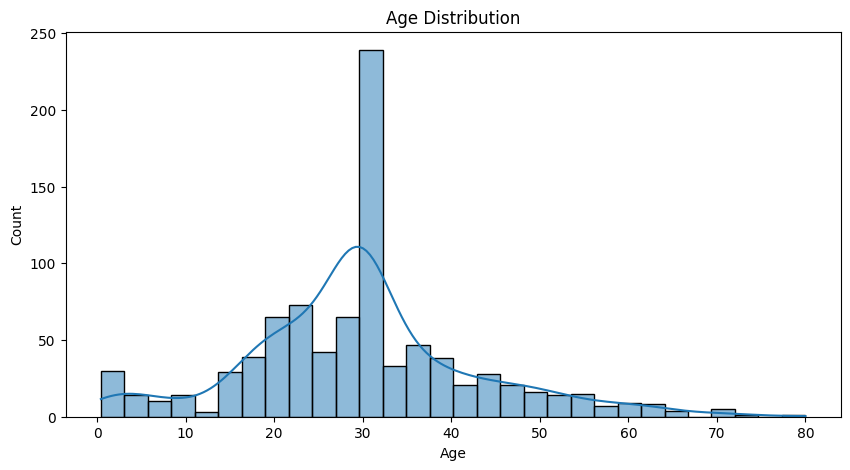

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


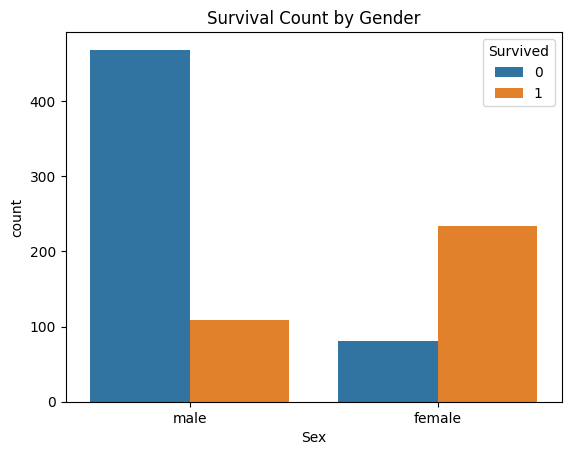

In [15]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


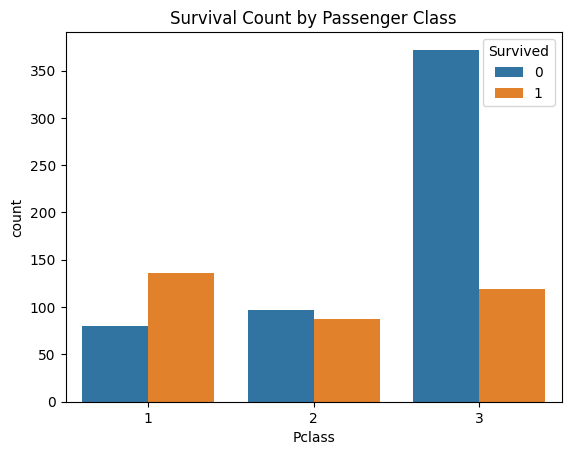

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


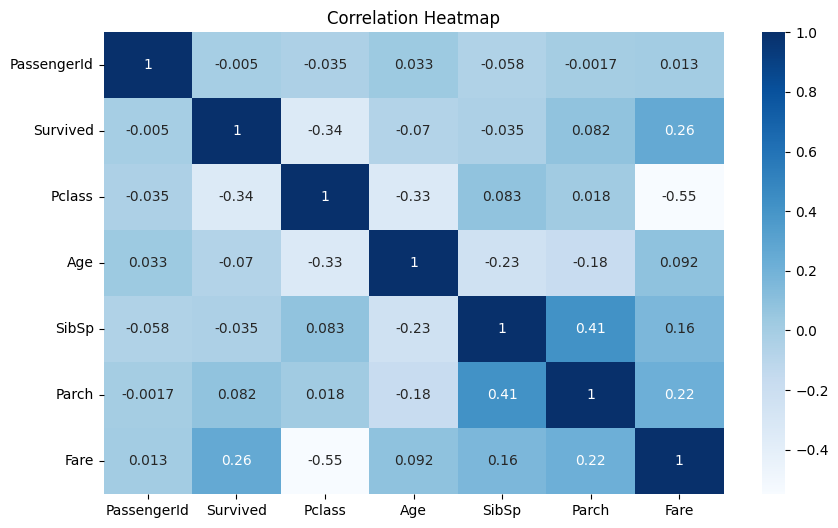

In [20]:
plt.figure(figsize=(10, 6))

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

plt.title('Correlation Heatmap')
plt.show()



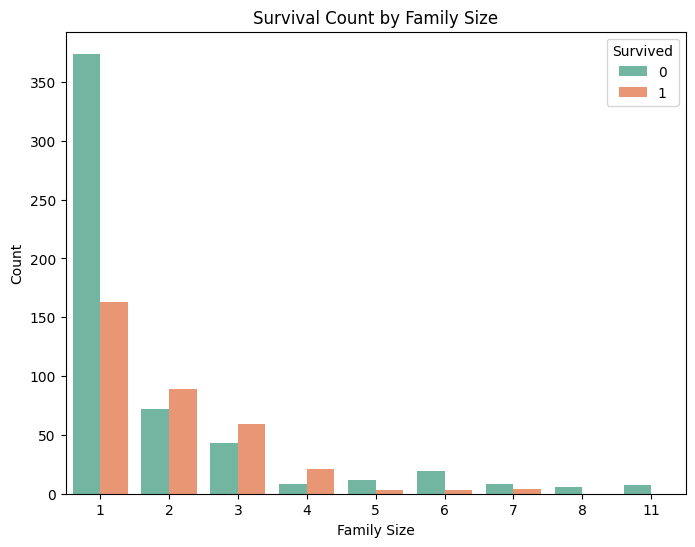

In [21]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


plt.figure(figsize=(8,6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


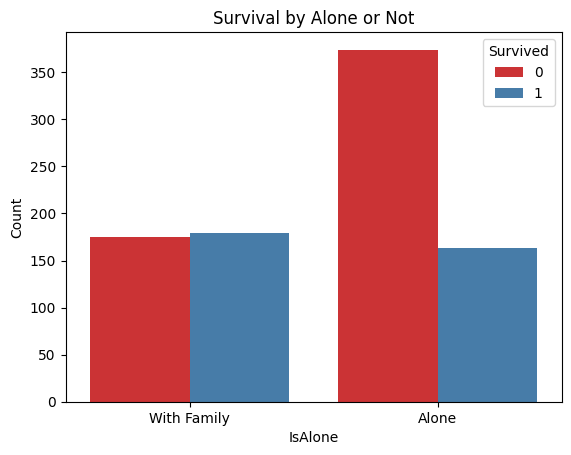

In [22]:

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


sns.countplot(x='IsAlone', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Alone or Not')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Count')
plt.show()


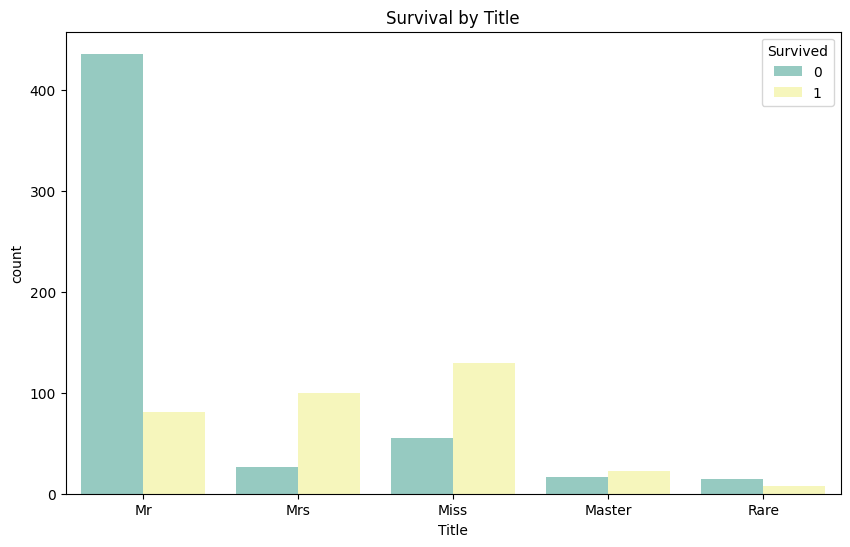

In [23]:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                    'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

plt.figure(figsize=(10,6))
sns.countplot(x='Title', hue='Survived', data=df, palette='Set3')
plt.title('Survival by Title')
plt.show()


## 💡 Key Conclusions from the Titanic Dataset Analysis:

- The overall survival rate was approximately 38%.
- Females had a significantly higher chance of survival compared to males.
- Passengers in 1st class had a higher survival rate than those in 2nd and 3rd class.
- Younger passengers, especially children, were more likely to survive.
- Passengers who had family members aboard (siblings, spouses, parents, or children) had slightly higher chances of survival.
- The higher the fare, the more likely the passenger was to survive, indicating that wealth had an influence.


## 📌 Recommendations:

- Consider building a predictive model using this dataset to identify survival probability based on passenger features.
- Improve safety protocols for lower-class passengers to reduce survival inequality.
- Prioritize vulnerable groups (e.g., women and children) in evacuation and safety planning.



💡 My Insights & Interpretation
Based on the analysis of the Titanic dataset:

There is a significant gender disparity in survival rates — females had a much higher chance of survival than males, likely due to evacuation protocols prioritizing women and children.

Passenger class is strongly correlated with survival — passengers in First Class had higher survival rates, suggesting that socioeconomic status influenced access to lifeboats.

Fare prices are positively correlated with both class and survival, indicating that wealthier individuals had better survival chances.

Children, particularly those under 10, showed higher survival rates, reinforcing the idea that they were prioritized during rescue operations.

The majority of Third Class passengers did not survive, possibly because of their cabins being located in the lower parts of the ship, making evacuation more difficult.

Missing data in 'Cabin' and 'Age' should be handled carefully in any predictive modeling, as it can impact results.

Overall, the data reflects social inequalities and rescue priorities, offering not just technical insights but also historical and ethical perspectives.



THANK YOU